In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
# This is our configuration file, cfg.py, which contains the variable names and related info.
import cfg
from cfg import *

In [83]:
# Load data from pickle file
with open('plot_data_old.pkl', 'rb') as f:
    plot_data_old = pickle.load(f)

with open('plot_data_new.pkl', 'rb') as f:
    plot_data_new = pickle.load(f)

In [84]:
# Choose your variable!
# Variables = "Opening Angle", "Proton Multiplicity", "Electron Energy", "Visible Energy"
name_of_variable = "Electron Energy" 
xvar, true_var, bins, xlow, xhigh, x_label, x_ticks = get_variable_info(name_of_variable)

From cfg.py...
Variable definition: Electron Energy
Reconstructed variable = shr_energy_cali
True variable = elec_e
Bins = [0.02, 0.22, 0.42, 0.62, 0.82, 1.22, 7.0]
Lowest x-value on plot = 0.02
Highest x-value on plot = 3
x-axis title = Electron Energy [GeV]
x-axis labels = [0.02, 0.22, 0.42, 0.62, 0.82, 1.22]


In [85]:
# Extract data from dictionaries
bincenters_old = plot_data_old['x']
result_xsec_old = plot_data_old['y']
binwidth_plot_old = plot_data_old['x_err']
y_err_old = plot_data_old['y_err']

bincenters_new = plot_data_new['x']
result_xsec_new = plot_data_new['y']
binwidth_plot_new = plot_data_new['x_err']
y_err_new = plot_data_new['y_err']

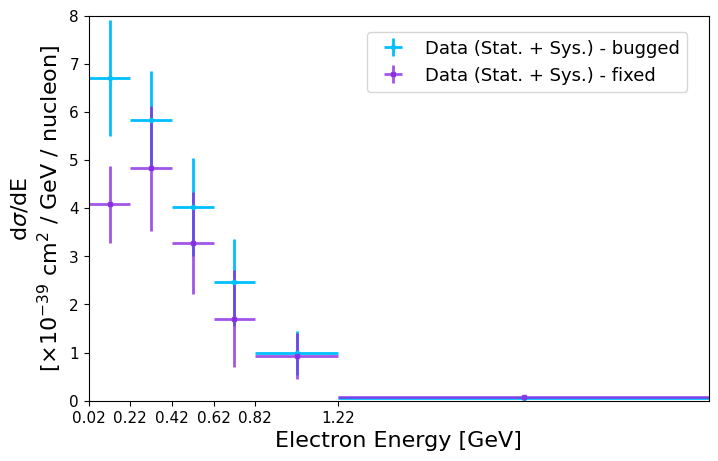

In [87]:
# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the old data with transparency
alpha_old = 1  # Adjust transparency (0 for fully transparent, 1 for opaque)
data_old = ax.errorbar(bincenters_old, result_xsec_old, xerr=binwidth_plot_old, yerr=y_err_old,
            fmt='o', color='deepskyblue', ecolor='deepskyblue', markersize=3, label='Data (Stat. + Sys.) - bugged',
            linewidth=2, alpha=alpha_old)

# Plot the new data with transparency
alpha_new = 0.8  # Adjust transparency (different from old data for better distinction)
data_new = ax.errorbar(bincenters_new, result_xsec_new, xerr=binwidth_plot_new, yerr=y_err_new,
            fmt='s', color='blueviolet', ecolor='blueviolet', markersize=3, label='Data (Stat. + Sys.) - fixed',
            linewidth=2, alpha=alpha_new)

# Customize plot elements (same as before)
plt.xlim(bins[0], xhigh)
plt.ylim(0, 8)
plt.xticks(x_ticks, fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel(x_label, fontsize=16)

if xvar == 'tksh_angle':
    plt.ylabel("d$\\sigma$/d(" + x_label + ")\n[$\\times 10^{-39}$ cm$^{2}$ / nucleon]", fontsize=16)
else:
    plt.ylabel("d$\\sigma$/dE\n[$\\times 10^{-39}$ cm$^{2}$ / GeV / nucleon]", fontsize=16)

# Adjust legend position
legend_bbox = (0.98, 0.98)  # Coordinates relative to the figure bounding box

plt.legend(fontsize=13, frameon=True, ncol=1, loc='upper right',
           bbox_to_anchor=legend_bbox, handles=[data_old, data_new])

for legobj in leg.legend_handles:
    legobj.set_linewidth(2.2)

plt.savefig("/exp/uboone/app/users/abarnard/plots/Data_Comparison.pdf", transparent=False, bbox_inches='tight', dpi=1000)

plt.show()